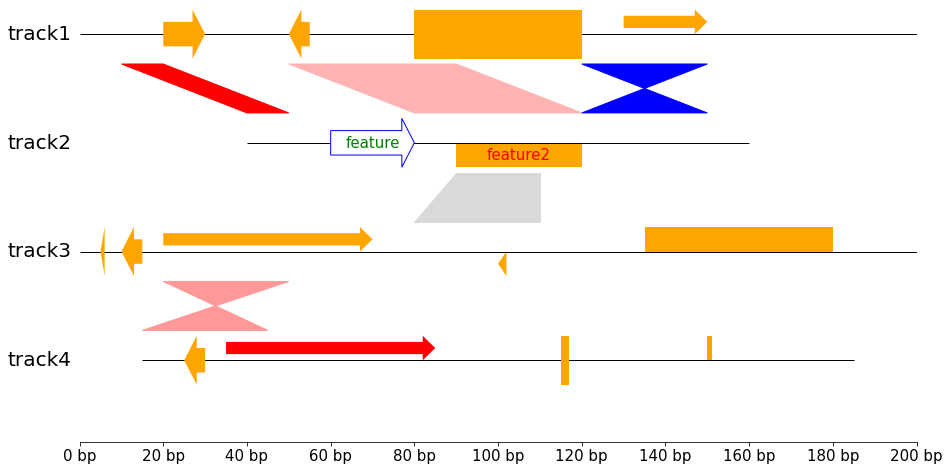

In [1]:
from pygenomeviz import GenomeViz
from matplotlib.colors import LinearSegmentedColormap, Normalize 
from matplotlib.colorbar import ColorbarBase


gv = GenomeViz(
    fig_width=15,
    fig_track_height=1.0,
    align_type="center",
    feature_size_ratio=0.90,
    link_size_ratio=0.90,
    arrow_shaft_ratio=0.5,
    feature_track_ratio=1.0,
    link_track_ratio=1.0,
    tick_track_ratio=1.0,
    track_spines=False,
    tick_style="axis",
)

# Track01
track1 = gv.add_feature_track(name="track1", size=200)
track1.add_feature(20, 30, 1)
track1.add_feature(50, 55, -1)
track1.add_feature(80, 120, -1, plotstyle="bigbox")
track1.add_feature(130, 150, 1, plotstyle="arrow")
# Track02
track2 = gv.add_feature_track(name="track2", size=120)
track2.add_feature(20, 40, 1, facecolor="white", edgecolor="blue", label="feature", labelcolor="green", linewidth=1.0)
track2.add_feature(50, 80, -1, plotstyle="box", label="feature2", labelcolor="red")
# Track03
track3 = gv.add_feature_track(name="track3", size=200)
track3.add_feature(5, 6, -1, edgecolor="orange")
track3.add_feature(10, 15, -1)
track3.add_feature(20, 70, 1, plotstyle="arrow", edgecolor="orange")
track3.add_feature(100, 102, -1, plotstyle="arrow")
track3.add_feature(135, 180, 1, plotstyle="box")
# Track04
track4 = gv.add_feature_track(name="track4", size=170)
track4.add_feature(10, 15, -1)
track4.add_feature(20, 70, 1, plotstyle="arrow", facecolor="#ff0000")
track4.add_feature(100, 102, -1, plotstyle="bigbox")
track4.add_feature(135, 136, 0, plotstyle="box")
# Track links
gv.add_link(("track1", 10, 20), ("track2", 0, 10), normal_color="red", interpolation_value=100)
gv.add_link(("track1", 50, 90), ("track2", 40, 80), normal_color="red", interpolation_value=30)
gv.add_link(("track1", 120, 150), ("track2", 110, 80), inverted_color="blue")
gv.add_link(("track2", 50, 70), ("track3", 80, 110), interpolation_value=30)
gv.add_link(("track3", 50, 20), ("track4", 0, 30), interpolation_value=40)

# figure = gv.plotfig()
# figure.subplots_adjust(right=0.8)
# cbar_ax = figure.add_axes([0.85, 0.2, 0.02, 0.6])
# cmap = LinearSegmentedColormap.from_list("cmap", ("white", "grey"))
# norm = Normalize(vmin=70, vmax=100)
# cb = ColorbarBase(cbar_ax, cmap=cmap, norm=norm, orientation="vertical")
# cb.set_label(label="Identity (%)", fontsize=15, loc="center")
# cb.ax.invert_axis()

gv.savefig("test.pdf")
# gv.print_tracks_info()


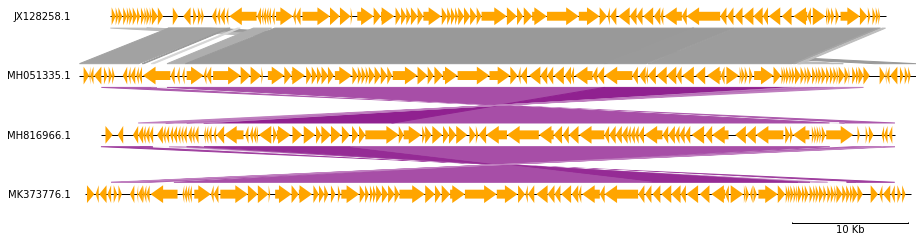

In [2]:
from pygenomeviz import GenomeViz, Genbank
from pathlib import Path
import csv

gv = GenomeViz(
    fig_width=15,
    fig_track_height=0.5,
    align_type="center",
    feature_size_ratio=0.90,
    link_size_ratio=0.90,
    arrow_shaft_ratio=0.5,
    feature_track_ratio=1.0,
    link_track_ratio=2.0,
    tick_track_ratio=1.0,
    track_spines=False,
    tick_style="bar",
    plot_size_thr=0.0005,
    tick_labelsize=10,
)

genbank_dir = "./genbank/phage"
gbk_files = Path(genbank_dir).glob("*.gbk")
for gbk_file in sorted(gbk_files):
    gbk = Genbank(gbk_file)
    track_name = gbk_file.with_suffix("").name
    track = gv.add_feature_track(name=track_name, size=gbk.full_length, labelsize=10)
    cds_features = gbk.extract_all_features(["CDS"])
    for feature in cds_features:
        start = feature.location.start
        end = feature.location.end
        strand = feature.strand
        label = feature.qualifiers.get("protein_id", [""])[0]
        track.add_feature(start, end, strand, "", plotstyle="bigarrow", linewidth=0.0, labelsize=5)

comparison_file = Path("./genbank_comparison.tsv")
with open(comparison_file) as f:
    reader = csv.reader(f, delimiter="\t")
    next(reader)
    for row in reader:
        ref_start, ref_end, ref_name = int(row[0]), int(row[1]), row[7]
        query_start, query_end, query_name = int(row[2]), int(row[3]), row[8]
        identity = float(row[6])
        track_link1 = (ref_name, ref_start, ref_end)
        track_link2 = (query_name, query_start, query_end)
        gv.add_link(track_link1, track_link2, interpolation_value=identity, vmin=85, inverted_color="purple")

gv.savefig("four_genomes.pdf")

# gv.print_tracks_info()
        